# Homework 3 : Samuel Diai - ENPC

## Convex Optimization : Lasso Regression

## Question 1

We study the LASSO problem : 
\begin{equation*}
\begin{aligned}
& \underset{w}{\text{minimize}}
& & \frac{1}{2}\left\|Xw - y \right\|_2^2  + \lambda \left\| w \right\|_1 \\
\end{aligned}
\end{equation*}

Which rewrites as : 

\begin{equation*}
\begin{aligned}
& \underset{w, t}{\text{minimize}}
& & \frac{1}{2}\left\|t \right\|_2^2  + \lambda \left\| w \right\|_1 \\
& \text{subject to}
& & t = Xw - y
\end{aligned}
\end{equation*}

We write the dual of the Lasso Problem, starting by writting the lagrangian associated with (LASSO)
$$ \mathcal{L}(t, w, \mu)  = \frac{1}{2}\left\|t \right\|_2^2  + \lambda \left\| w \right\|_1 + \mu^T(t - Xw + y) = \frac{1}{2}\left\|t \right\|_2^2  + \mu^Tt+ \lambda \left\| w \right\|_1 - \mu^TXw + \mu^Ty$$ 

The dual function is : 
$$ g(\mu)  = \underset{w, t}{\text{inf}}\mathcal{L}(t, w, \mu) = \mu^Ty + \underset{t}{\text{inf}}\left\{\frac{1}{2}\left\|t \right\|_2^2  + \mu^Tt\right\} + \underset{w}{\text{inf}}\left\{\lambda \left\| w \right\|_1 - \mu^TXw\right\}$$ 
As we can separate the minimization over (w, t) to two separate minimization problems.
We have : 
* $\underset{t}{\text{inf}}\left\{\frac{1}{2}\left\|t \right\|_2^2  + \mu^Tt\right\} = -\frac{1}{2}\left\|\mu\right\|_2^2$. We just compute the gradient wrt t and put it equal to zero as the function $t \mapsto \frac{1}{2}\left\|t \right\|_2^2  + \mu^Tt$ is coercive, convex, differentiable.
* As we have seen in the homework 2 : 
$\underset{w}{\text{inf}}\left\{\lambda \left\| w \right\|_1 - \mu^TXw\right\} = \left\{
    \begin{array}{ll}
        0 & \mbox{if } \left\| \frac{1}{\lambda}X^T\mu\right\|_\infty \leq 1\\
        -\infty & \mbox{otherwise.}
    \end{array}
\right.$

Thus : 
$$ g(\mu) =  \left\{
    \begin{array}{ll}
        \mu^Ty - \frac{1}{2}\left\|\mu\right\|_2^2 & \mbox{if } \left\| \frac{1}{\lambda}X^T\mu\right\|_\infty \leq 1\\
        -\infty & \mbox{otherwise.}
    \end{array}
\right.$$ 

The dual problem writes as : 

\begin{equation*}
\begin{aligned}
& \underset{\mu}{\text{maximize}}
& & \mu^Ty - \frac{1}{2}\left\|\mu\right\|_2^2 \\
& \text{subject to}
& & \left\| \frac{1}{\lambda}X^T\mu\right\|_\infty \leq 1
\end{aligned}
\end{equation*}

Which is equivalent to : 
\begin{equation*}
\begin{aligned}
& \underset{\mu}{\text{minimize}}
& & \frac{1}{2}\left\|\mu\right\|_2^2 -\mu^Ty\\
& \text{subject to}
& & \left\| X^T\mu\right\|_\infty \leq \lambda
\end{aligned}
\end{equation*}

By observing that :
$$ 
\left\| X^T\mu\right\|_\infty \leq \lambda  \iff \left\{
    \begin{array}{ll}
        X^T\mu \leq \lambda \mathbb{1}_d\\
        -X^T\mu \leq \lambda \mathbb{1}_d
    \end{array}
\right.
$$
Equal to  :

\begin{equation*}
\begin{aligned}
& \underset{\mu}{\text{minimize}}
& & \frac{1}{2}\mu^T \mathbb{1}_{n, n} \mu  -\mu^Ty\\
& \text{subject to}
& & \begin{bmatrix}
           X^T \\           
           -X^T 
    \end{bmatrix}          
    \mu ⪯ \lambda \mathbb{1}_{2d}
\end{aligned}
\end{equation*}

We have the closed form requested : 
\begin{equation*}
\begin{aligned}
& \underset{v}{\text{minimize}}
& & v^T Q v  +v^Tp\\
& \text{subject to}
& & Av ⪯ b
\end{aligned}
\end{equation*}
With : 
* $A = \begin{bmatrix}
           X^T \\           
           -X^T 
    \end{bmatrix}$
* $Q = \frac{1}{2}\mathbb{1}_{n, n}$ (Which is obviously PSD)
* $y=-p$
* $b=\lambda \mathbb{1}_{2d}$

## Question 2 : 

For the centering_step, we minimise : 
$f_t : v \mapsto t(v^T Q v  + v^Tp)-\mathbb{1}^T\text{log}(-Av + b)$, where the logarithm is applied to each component of the vector $-Av + b$ 

We need to compute $\nabla f_t$ and $\nabla^2  f_t$
We have : 
$$\nabla f_t = t(2Qv + p) - \sum_i\frac{1}{-A_iv + b_i}A_i^T = t(2Qv + p) - \sum_i\frac{1}{A_iv - b_i}A_i^T$$

Which can be rewritten using vector/matrix operations: 
$$
\nabla f_t = t(2Qv + p) - A^T\frac{1}{(Av - b)}, \text{ where }\frac{1}{Av - b} = \begin{bmatrix}
           \frac{1}{A_0v - b_0} \\ 
           \text{...}\\
           \frac{1}{A_nv - b_n}
\end{bmatrix}
$$


And : 
$$\nabla^2 f_t = 2tQ + \sum_i\frac{1}{(A_iv - b_i)^2}A_i^T.A_i $$
    
Which can be rewritten using vector/matrix operations (this is usefull so I can use numpy vectorized operations instead of doing for loops): 
$$\nabla^2 f_t = 2tQ + A^T\text{diag}\left(\frac{1}{(Av - b)^2}\right) A, \text{ where }\frac{1}{(Av - b)^2} = \begin{bmatrix}
           \frac{1}{(A_0v - b_0)^2} \\ 
           \text{...}\\
           \frac{1}{(A_nv - b_n)^2}
\end{bmatrix}
$$

In [1]:
import numpy as np
## We create objective function, gradient, and hessian using the above results.
def f_t(t, v, Q, p, A, b):
    f_0 = (v.T).dot(Q.dot(v)) + (v.T).dot(p)
    log_ = b - A.dot(v)
    log_barrier = - np.log(log_).sum()
    return np.squeeze(t * f_0 + log_barrier)

def gradient_t(t, v, Q, p, A, b):
    grad_0 = 2*Q.dot(v) + p
    grad_barrier = (A.T).dot( 1/ (b - A.dot(v)))
    return t * grad_0 + grad_barrier
    
def hessian_t(t, v, Q, p, A, b):
    hessian_0 = 2*Q
    diag_ = np.diag(np.squeeze(1/ (b - A.dot(v))**2))
    hessian_barrier = (A.T).dot(diag_).dot(A)
    return t * hessian_0 + hessian_barrier

We write the centering step algorithm, which is a Newton method to minimize $f_t$ (with a given $t$)

For the backtracking line search, we add another condition.
That is at each step $v + t\text{d}v$ must be in the domain of $f_t$ (especially in the log operation), that is $b - A(v + t\text{d}v) > 0$, if it is not, we keep updating $t$ as $ \beta t$

* $t$ starts equal to 1
* while $f(v + t\text{d}v) \geq f(v) + \alpha t\nabla f_t(v)\text{d}v$ or $b - A(v + t\text{d}v) <= 0$

     repeat $t = \beta t$ until :

 

In [2]:
def backtracking_line_search_t(t, v, dv, Q, p, A, b):
    rate = 1
    while (b - A.dot(v + rate*dv) <= 0).any() or \
           f_t(t, v + rate*dv, Q, p, A, b) >= f_t(t, v, Q, p, A, b) + _alpha*rate*gradient_t(t, v, Q, p, A, b).T.dot(dv):
        rate *= _beta
    return rate

    
def centering_step(t, v0, eps,  Q, p, A, b):
    v = v0
    v_seq = []
    while True :
        ## Append v 
        v_seq.append(v)
        ## Compute hessian and gradient
        hessian_t_v = hessian_t(t, v,  Q, p, A, b)
        gradient_t_v = gradient_t(t, v,  Q, p, A, b)
        ## Compute inverse of the hessian matrix: 
        inv_hess_t_v = np.linalg.solve(hessian_t_v, np.eye(hessian_t_v.shape[0]))
        ## Compute newton step :
        dv = - inv_hess_t_v.dot(gradient_t_v)
        ## Compute lambda : 
        lambda_ = np.squeeze( np.dot(gradient_t_v.T, inv_hess_t_v.dot(gradient_t_v)) )
        if lambda_ / 2 <= eps : 
            break
        else : 
            step = backtracking_line_search_t(t, v, dv, Q, p, A, b)
            v = v + step * dv
    return v_seq

We can write the barrier method algorithm, using the centering_step at step $t$, the method compute_primal_solution_given_dual is used to obtain an approximate solution of the primal given an approximate solution of the dual. It is mathematically described bellow (I wrote it here since I use it in the barr_method algorithm)

In [3]:
def compute_primal_solution_given_dual(v, eps_lambda = 1e-3):
    w = np.zeros((d, 1))
    matrix = X.T.dot(v)
    ## Compute idx where X^T*v = +- lambda
    close_to_lambda = np.isclose(np.abs(matrix), _lambda, atol = eps_lambda, rtol = 0)
    ## Solve for relevant rows
    w_solved, _, _, _ = np.linalg.lstsq(X[:, np.squeeze(close_to_lambda)], y - v, rcond=None)
    w[close_to_lambda] = np.squeeze(w_solved)
    return w

def barr_method(v0, eps_barr, eps_centering, mu, Q, p, A, b):
    t = t_barr
    # Initialise lists
    v_star_seq = []
    duality_gap = []
    newton_iterations = []
    f_seq = []
    # iterate
    while True : 
        v_seq = centering_step(t, v0, eps_centering, Q, p, A, b)
        v_star = v_seq[-1]
        f_seq.append(f_0(v_star, Q, p, A, b))
        v_star_seq.append(v_star)
        duality_gap.append(2*d/t)
        newton_iterations.append(len(v_seq))
        if 2*d/t < eps_barr : 
            break
        else : 
            t = mu*t
    ## Recover best v_star with a given mu
    min_idx = np.argmin(f_seq)
    min_vstar = v_star_seq[min_idx]
    ## Compute associated w_star (compute_primal_solution_given_dual is described bellow and allows us to recover w_star given v_star)
    min_wstar = compute_primal_solution_given_dual(min_vstar)
    return v_star_seq, f_seq, duality_gap, np.cumsum(newton_iterations), min_vstar, min_wstar
    

## Question 3

### Numerical Paramaters 

In [4]:
## Initilizing X, lambda_, y, n, d
n, d = 20, 100
X = 30*np.random.rand(n, d)
_lambda = 10
y = 20*np.random.rand(n, 1)

## Defining A, Q, p
A = np.concatenate((X.T, -X.T), axis = 0)
b = _lambda * np.ones((2*d, 1))
Q = np.eye(n)*1/2
p = -y
## parameters for backtracking line search : 
_alpha = 0.01
_beta = 1/2
## parameters for barr_method : 
t_barr = 1

In [5]:
def compute_primal(w, X, y, lambda_):
    return 0.5*np.linalg.norm(X.dot(w) - y, ord = 2)**2 + lambda_ * np.linalg.norm(w, ord = 1)

def f_0(v, Q, p, A, b):
    return (v.T).dot(Q.dot(v)) + (v.T).dot(p)

# Results

In [17]:
import matplotlib.pyplot as plt

mus = [2, 5, 10, 20, 50, 100, 150, 200, 300]
# Barrier method 
f_seq_stored  = {}
newton_iterations_stored = {}
duality_gap_stored = {}
primal_w_stored = {}
dual_v_stored = {}
for mu in mus:
    v_ini = np.zeros((n, 1))
    v_star_seq, f_seq, duality_gap, newton_iterations, min_vstar, min_wstar = barr_method(v0 = v_ini, eps_barr = 1e-5, eps_centering = 1e-5, mu = mu, Q = Q, p = p, A = A, b = b)
    f_seq_stored[mu] = f_seq
    newton_iterations_stored[mu] = newton_iterations
    primal_w_stored[mu] = min_wstar#compute_primal(min_wstar, X, y, _lambda)
    dual_v_stored[mu] = min_vstar#f_0(min_vstar, Q, p, A, b)
    duality_gap_stored[mu] = duality_gap
f_star = np.min(np.concatenate([f_seq_stored[mu] for mu in mus]))  



We plot the approximation error (difference between the best f_star we've had and f_star(mu) the value we have at each centering_step) as a function of the number of barrier method iterations.

[]

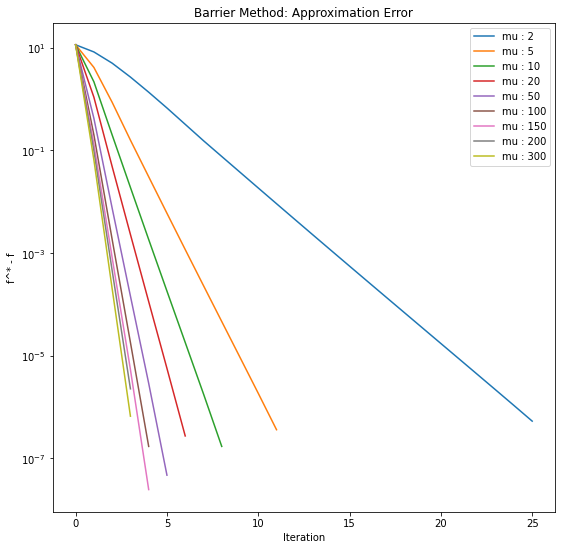

In [18]:
fig, ax = plt.subplots(figsize = (9, 9))
for mu in mus : 
    delta_star = f_seq_stored[mu] - f_star
    ## Remove where f_star == f_seq (ie where delta_star == 0)
    delta_star = np.array(delta_star)[np.where(delta_star != 0)]
    ax.plot(range(len(delta_star)), delta_star, label = 'mu : %s' % mu)

ax.set(xlabel='Iteration', ylabel='f^* - f',
       title='Barrier Method: Approximation Error')
ax.set_yscale('log')
ax.legend()
ax.plot()


As we can see the error seems to decrease faster with a high $\mu$. It doesn't seem to have an intermediate $\mu$ value that gives the best results. Taking the highest value possible will give the fastest convergence.

We can also plot, the barrier method criterion as a fonction of the total number of cumulated Newton Iterations (for different values of $\mu$).

[]

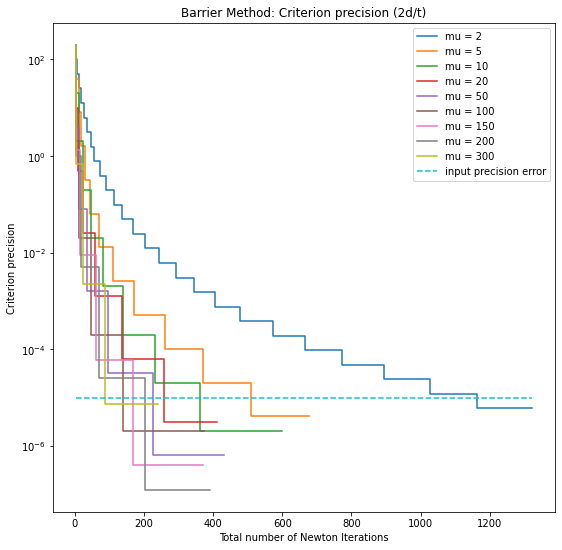

In [19]:
fig, ax = plt.subplots(figsize = (9, 9))
for mu in mus : 
    ax.semilogy(newton_iterations_stored[mu], duality_gap_stored[mu], drawstyle = 'steps', label = "mu = {}".format(mu))

ax.set(xlabel='Total number of Newton Iterations', ylabel='Criterion precision',
       title='Barrier Method: Criterion precision (2d/t)')

plot_range = [np.min([np.min(newton_iterations_stored[mu]) for mu in mus]), 
              np.max([np.max(newton_iterations_stored[mu]) for mu in mus])]
ax.plot(plot_range, [1e-5]*len(plot_range), linestyle = '--', label = 'input precision error')
ax.set_yscale('log')
ax.legend()
ax.plot()

As we can see on this plot, high values of $\mu$ also implies fast convergence. It converges the fastest with $\mu = 300$, but $\mu = 100$ gives the second convergence speed. It can be an appropriate value for $\mu$.

## Impact on $w$

Now that we have an approximate solution $v^\star$of the dual problem, we try to deduce a solution of the primal $w^\star$.
The objective function of the (LASSO) problem is obviously convex (by sum of two convex functions). And the equality constraint is linear. 
Moreover, as the point $t = 0_d$, $w = -y$) satisfies  $t = Xw - y$, strong duality holds by Slater's condition. ($d^\star = -p^\star$).

We can verify it numerically. To do that we need to compute the solution of the primal $w^\star$ given the solution of the dual $v^\star$.

The feasability condition of the primal gives : 
* $$
 t = Xw^\star - y
$$
The lagrangian is :
$$ \mathcal{L}(t, w, v)  = \frac{1}{2}\left\|t \right\|_2^2  + v^Tt+ \lambda \left\| w \right\|_1 - v^TXw + v^Ty$$ 
The first order condition with respect to t gives : 
$$ t + v = 0$$ 
As the function $w\mapsto \left\| w \right\|_1$, is not differentiable we need to distinguish some cases : 
* If $w_j \neq 0$ we can write the first order condition wrt. $w_j$ : 
   
   $$ 
    \lambda \text{sign}(w_j) - [X^Tv]_j = 0 \iff  \lambda \text{sign}(w_j) - [X^T]_jv = 0 \iff  \lambda \text{sign}(w_j) - (X_j)^Tv = 0
    $$
   
   where $[X^T]_j$ denotes taking the $j$-th row of the matrix $X^T$ and $X_j$ denotes taking the $j$-th column of the matrix $X$


Thus, given $v^\star$, we have two relations : 

$$  \left\{
    \begin{array}{ll}
        Xw^\star = y - v^\star \\
        \forall w^\star_j \neq 0, \lambda \text{sign}(w^\star_j) = X_j^Tv^\star
    \end{array}
\right.$$ 

To get $w^\star$, we compute $X^Tv^\star$. Then we take the indices $j \in J$ of components of this vector where $|X_j^Tv^\star| = \lambda$. In the code, we extract these values with a certain $\epsilon$ error (parameter of the function).

We create the matrix $X_J$ where we keep the columns $j \in J$ 

And we have :
$$ X_Jw_J^\star = y - v^\star$$

And invert this relation with the pseudo inverse (or least square): 
$$ w_J^\star = (X_J^T X_J)^{-1}X_J^T (y - v^\star) $$ 
For the other components $j \in \left[|1, d|\right ] \setminus J$, we can set $w_j = 0$.

The python function is written bellow : 


In [20]:
def compute_primal_solution_given_dual(v, eps_lambda = 1e-3):
    w = np.zeros((d, 1))
    matrix = X.T.dot(v)
    ## Compute idx where X^T*v = +- lambda
    close_to_lambda = np.isclose(np.abs(matrix), _lambda, atol = eps_lambda, rtol = 0)
    ## Solve for relevant rows
    w_solved, _, _, _ = np.linalg.lstsq(X[:, np.squeeze(close_to_lambda)], y - v, rcond=None)
    ## Updata weights with the selected indices 
    w[close_to_lambda] = np.squeeze(w_solved)
    return w

We can plot the error (in absolute value) between the primal and the dual. (for different values of $\mu$)

No handles with labels found to put in legend.


[]

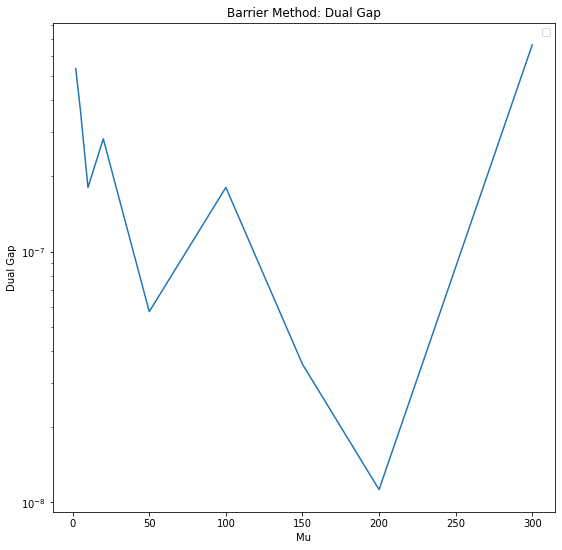

In [22]:
fig, ax = plt.subplots(figsize = (9, 9))
diff_dual = []
for mu in mus : 
    diff_dual.append(np.abs(np.squeeze(compute_primal(primal_w_stored[mu], X, y, _lambda) + f_0(dual_v_stored[mu], Q, p, A, b))))
ax.plot(mus, diff_dual)
ax.set(xlabel='Mu', ylabel='Dual Error',
       title='Barrier Method: Dual Error')
ax.set_yscale('log')
ax.legend()
ax.plot()


As we can see, the error between the primal and the dual is very low, for any values of $\mu$. For $\mu = 200$, we have the minimal value. I'm not sure if that's because this value is more intersting than the others or because it is due to numerical approximation errors.